## Hey!!! This just *Looks* like a BIIGGGG Notebook because it contains detailed version of everything of what can be done using a simple pre-built code so don't get scared and try *NOT* to finish this notebook in one day.

Hi Fellow Beginners. If you have come to this post, I hope you learn from it. I have tried my best to teach you the basics of `Pytorch`. People use `Keras` specially beginners including me but `Keras` does not provide the feel of Neural Networks. Creators of `Pytorch` wanted it to be dynamic like `Python` and as close as possible to the Neural Networks. This is a tutorial about `Pytorch`  basics and CNN and Image Recognition. If you want to learn more about Deep Learning and Keras, please check out [my dedicated notebook](https://www.kaggle.com/deshwalmahesh/bengali-ai-complete-beginner-tutorial-95-acc) on the art of CNN, Image Processing, Theory of AI and find some very very useful and interesting links there. 

## NOTE:
**This notebook is meant to run on local system so download it to see the full benifits of it and Please write and practice every code and line by line using your head and hand and try to implement it. You can make a new cell below the original code and WRITE it yourself. Whatever happens, DO NO COPY AND PASTE**

## Super important Notes of COMPLETE Beginners
We'll build a Neural Network and more specifically a Convolution Network. NN, CNN works on finding and memorizing the patterns like we humans do but subconciously. We do not have to apply a lot of load because we have memorized and learned to memorize the patterns from billions of years of evolution and we are trying to teach this this to computers within what, a hundred years or less. Not Fair! And I can not give you a whole lot of Deep Learning in this mere notebook but before we start into the solution, I highly rcommend and I repeat, I HIGHLY RECOMMEND to watch these [Neural Network series](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/playlists?view=50&sort=dd&shelf_id=20) and [Fundamentals of Deep Learning and Neural Networks](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU) where mazing people giving you *INSIGHTS* of what happens *ACTUALLY INSIDE* the mathemetics of something , how things work, what are *PRACTICAL SIGNIFICANCE* of formulas we use and all the things. I had a sudden revealation from these such as **Neural Networks JUST find the patterns and we have high hopes that they'll find and to our surprise, they even just do. NN doesn't even know what they havefound.**  And some amazing visual explanations of **Working of Gradients**, **Significance of Eignveectors and EignValues and why and how are they used, How Convolution , Pooling ACTUALLY works** and so on. Few of the videos on Keras are [available here](https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL). I am just trying to give you the best of I have after searching through tons of tutorials and blogs.

# Import the libraries
If an error comes to you, it is a good thing  because then you'll be eager to know and while getting the answers for exact problems, you'll get a whole lot of other knowledge you didn't even know existed. 

In [1]:
import numpy as np # numpy is base of everything we see in machine leraning using python
import pandas as pd # pandas handles the data in a formatted way
import torch # it is the pytorch package
from torch import nn # Neural Network Package
from torch import optim # Optimizer
import torch.nn.functional as F # We use Functional API for flexibility
import torchvision # to deal with images
from torchvision import transforms # performs transformations
import matplotlib.pyplot as plt # Our FAV
from tqdm import tqdm # Fancy tool that does not let you get bored while in training
from sklearn.metrics import confusion_matrix # confused? DOn't be. It is just a simple confusion matrix ;)
import seaborn as sns # how can we forget seaborn when we want fancy
from torch.utils.tensorboard import SummaryWriter # this is where the magic happens in real time
import itertools # you know, some tools to do random things for you

# Tensors! Tensors! Tensors!

## Basic Operations 
Before diving deep into the world of PyTorch, remeber one thing that every operation is performed in the form of tensors. In mathematical terms, Tensors are functions that provide bla..bla..bla.. We, as ML engineers tend to reshape everything (literally) and have reshaped the meaning of this one too. So what are tensors?? Any body??
Yes, You!!
Great answer!
Fancy names for Matrices!!!! Tensors are just other names for matrices when it comes to AI and the main difference is that they can be operated on GPU which happens to be 50x to 100x faster than CPU.

Pytorch handles the data very closely related to numpy. You can see a lot of methods and functionality that is common between the two. If you run into a problem, run to the Pytorch's community and trust me, those are very helpful people.

In [2]:
t = torch.tensor([[1,2],[3,4]]) # create a basic tensor
print(t.shape)
t

torch.Size([2, 2])


tensor([[1, 2],
        [3, 4]])

In [3]:
rank = len(t.shape) # length of shape = Rank of a tensor
rank
# rank of a tensors tells us that how deep do we have to go before we can access the values. Going deep below the
# rank will always give you another tensor of a 2-D shape

2

If you try to access `t[0]`, it'll be another tensor and depth is 1. Output of a tensor is another tensor be it slicing or a single value.`t[0][0]` means that we have accessed the full depth but the output is still a tensor itself.

In [4]:
print(t[0][0]) # see the output that it's a tensor

# to access a value from it, use
item = t[0][0].item()
print(item)

# item object is only for tensors having " scalar values" try using t[0].item()

tensor(1)
1


To get the meaning of `stride` here, please check the [documentation for stride](https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.layout) or this [stackoverflow link](https://stackoverflow.com/questions/56659255/what-does-layout-torch-strided-mean)

In [5]:
print(t.device) # get the current operating device
print(type(t))
print(t.type()) # get the type of a tensor. there are many types of tensors in PyTorch. See the docs
print(t.dtype) # what is the type of data inside that specific tensor
print(t.layout) # stride is just another name for Dense

cpu
<class 'torch.Tensor'>
torch.LongTensor
torch.int64
torch.strided


### Enabling GPU if installed
You can change the device to CUDA if you have GPU enabled

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # this will automatically set operations on GPU
print('Using device:', device)

if device.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu


###  Operations on Tensors are done IFF they are on same device only and IFF they have same dtype 
(version > 1.3.0 can perform operations on float and int)

In [7]:
t1 = torch.tensor([[1,2],[2,3]])
t2 = torch.tensor([[1.1,2.2],[2.2,3.3]])
# t3 = t1.cuda() # No CUDA Present error

print(t1.dtype)
print(t2.dtype)

torch.int64
torch.float32


In [8]:
t1+t2
# print(t1+t3) # it'll produce an error. Check for yourself

tensor([[2.1000, 4.2000],
        [4.2000, 6.3000]])

### There are basically 4 ways of creating tensors from numpy array or data
1. Tensor Class
2. tensor method inside torch module
3. from_numpy method
4. as_tensor method

In [9]:
data = np.array([1,2,3])

In [10]:

t1 = torch.Tensor(data)  # pass data inside the Constructor of the Tensor class directly
# equivalent to t = torch.tensor(data,dtype=torch.float32)

print(t1)
print(f't1 belongs to: {type(t1)}')
print(f'Type of t1 is: {t1.type()}')
print(f'Type of data inside t1 is {t1.dtype}')


tensor([1., 2., 3.])
t1 belongs to: <class 'torch.Tensor'>
Type of t1 is: torch.FloatTensor
Type of data inside t1 is torch.float32


In [11]:
t2 = torch.tensor(data) # Factory Function 
#  equivalent to t = torch.tensor(data,dtype=torch.int64)


print(t2)
print(type(t2))
print(t2.type())
print(t2.dtype)

tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [12]:
t3 = torch.from_numpy(data) # (Factory) Function

print(t3)
print(type(t3))
print(t3.type())
print(t3.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


In [13]:
t4 = torch.as_tensor(data) # Factory Function

print(t4)
print(type(t4))
print(t4.type())
print(t4.dtype)


tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.LongTensor
torch.int64


### Difference
To see the difference, try to modify values of `data` now

In [14]:
data[0] = 5
data[2] = 7

In [15]:
print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([5, 2, 7])
tensor([5, 2, 7])


### SEE the DIFFERENCE? 
First 2 use `COPY` of data. Last 2 `SHARE` the same instances. So based on whether you want to perform an operation on the same tensors (suitable for situation when you are running low on memory and do not need the original tensor later) or you can have a copy of tensors (cases where you want the original data too and memory is not a constraint)

### Reshaping, stacking, Flattening
We have to perform these operations on a daily basis and are very general for AI and Deep learning.

In [16]:
# each value represents a pixel of 4*4 image
one = torch.tensor([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]).reshape(4,4)  # converts into a 4*4 matrix
print(one,'\n')

two = torch.tensor([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]).reshape(4,4)
print(two,'\n')

three = torch.tensor([3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]).reshape(4,4)
print(three,'\n')

stacked = torch.stack((one,two,three)) # make a batch of 3 images so shape is (3,4,4)
print('Stacked:\n',stacked)

stacked_reshaped = stacked.reshape((3,1,4,4)) # batch, color channels, height, width

stacked_reshaped_flattened = stacked_reshaped.flatten(start_dim=1) 
# leave the batch as it is but flatten all the pixels
stacked_reshaped_flattened

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]) 

tensor([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]]) 

tensor([[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]]) 

Stacked:
 tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [17]:
another_method = stacked_reshaped.reshape((3,16)) # Flatten each image
another_method

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

### Tensor broadcasting
This one is very important because a lot of peole do not know what is happening behind the scenes when you multiply or divide a scaler with a tensor. Remember one thing that
**Tensor works only and only on  `Element vise` operations**

In [18]:
print(t1*(3))
print(t1.mul(3))
# it is not scaler multiplication but the scaler is broadcasted

tensor([3., 6., 9.])
tensor([3., 6., 9.])


To get the idea, it is like copying a scaler to same dimension and then checking every element of one tensor to every element of second on the same index. It means that the scaler is converted to a matrix/tensor which has dimensions equal to the given matrix/tensor and is full of that scaler value. 
To have another deep knowledge, look at the output given below

In [19]:
t1%2 == 0 

tensor([False,  True, False])

In [20]:
# It is just like making an tensor of same shape as of given tensor but with all the scaler values
broadcasted_3 = torch.from_numpy(np.broadcast_to(3,t1.shape))
print(f'Broadcasted tensor: {broadcasted_3}')
print(t1*broadcasted_3)
print(t1.mul(broadcasted_3))

Broadcasted tensor: tensor([3, 3, 3])
tensor([3., 6., 9.])
tensor([3., 6., 9.])


# Let's go CNN
"Why we need CNN but?"
"You kidding", my brain replied.
"No, but, okay!! well tell me why not Fully or Dense?",asked the silly me.
"Imagine what it likes to have an image?? A matrix of (28x28) which have an order that makes an image IMAGE. DNN can't find that order for startes and lets us just assume EVEN IF THEY DO BY MAGIC, it'll blow the memory."

Now here is the basic of Digital Images:

**Every color is made up of Red,Green,Blue (3 channels) and in computers we represent these colors by numbers ranging from (0-255) where 0 represents White and 255 represents Black. Each color has it's own values in case of 3 channel images but in grayscale, we just have one channel so we get B&W pictures. To get a better understanding of how does all of this makes sense, just [visit this link](https://www.youtube.com/watch?v=bwb4r3UVKko)**

##  Torchvision Datasets
We will use the dataset given with the `torchVision` module. You need to `pip install torchvision` or the `conda` version of it if not already done. 

Those who are not in the field of ML, this is the corniest and most used dataset worldwide in my opinion. So used that it'd ne needing a break from all this find about itself had it been a real thing. 10 types of images,6000 per types making a total of 60000 converted into grayscale and resized to (28,28). By training the model about how each image how it looks like, we want mode lto predict the exact for a new image. This is all we do with  the children, all the time. "Het it's a dog!! What's that? What's that?? Dog!!" We are basically training our children or making them cram the shapes. Same thing with CNN.

In [21]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32)

Extracting ./Data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./Data/FashionMNIST/FashionMNIST/raw


Extracting ./Data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./Data/FashionMNIST/FashionMNIST/raw


Extracting ./Data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./Data/FashionMNIST/FashionMNIST/raw




Extracting ./Data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./Data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


In [22]:
print(f'There are {len(train_set.targets)} images in our data  where each one belongs to one of 10 classes and the classes are LabelEncoded as {dict(zip(train_set.classes,range(10)))}')


There are 60000 images in our data  where each one belongs to one of 10 classes and the classes are LabelEncoded as {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


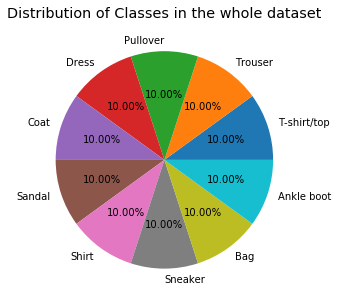

In [23]:
fig = plt.figure(figsize=(5,5))

plt.pie(train_set.targets.bincount().numpy(),
        labels=dict(zip(train_set.classes,range(10))),
        autopct='%1.2f%%')

plt.title('Distribution of Classes in the whole dataset',size='x-large')
plt.show()

## Explore Data
Each image is formed by `(1,28,28)` pixels which means that in order to define a single grayscale image, we have to use (28*28) pixels. Our data in shown in `(Channels,Width,Height)` format

Our train set use the batch so each batch has an extra dimension

In [24]:
sample = next(iter(train_set))
print(type(sample))
print(len(sample))
# first entry sample[0] are the pixels and second sample[1] is the label
pixels,label = sample # or pixels,labels = sample[0], sample[1]
print(pixels.shape)

<class 'tuple'>
2
torch.Size([1, 28, 28])


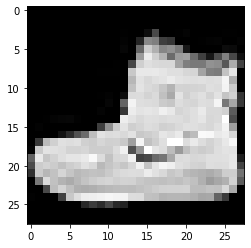

In [25]:
plt.imshow(pixels.reshape(28,28),cmap='gray')
# plt.imshow(pixels.squeeze()) # there is an extra image axis so we have to remove it
plt.show()

In [26]:
batch = next(iter(train_loader)) # iter makes the list as an iterator. Iterator gives you an object one at a time
# With each time instance a new object is generated (yield) like factory rather than a warehouse (return)
print(f'A batch has {len(batch)} elements and type of batch is {type(batch)}')

A batch has 2 elements and type of batch is <class 'list'>


In [27]:
images,labels = batch
print(f'Number of images in a single batch is {len(images)} and there are {len(labels)} labels corresponding to each image')
print(f'Type of Images is {type(images)} which is a collection of images  of (28x28) pixels')
print(f'Shape of those Images is {images.shape}')

Number of images in a single batch is 32 and there are 32 labels corresponding to each image
Type of Images is <class 'torch.Tensor'> which is a collection of images  of (28x28) pixels
Shape of those Images is torch.Size([32, 1, 28, 28])


### Plot Random Images
We will use `make_grid` to make a grid and then plot images inside the batches uaing `matplotlib`

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])


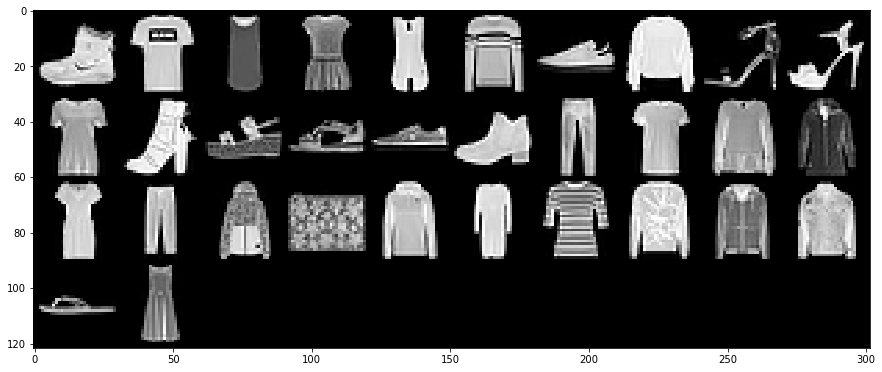

In [28]:
grid = torchvision.utils.make_grid(images,nrow=10) #nrow is number of elements in a single row
plt.figure(figsize=(15,12))
plt.imshow(np.transpose(grid,(1,2,0))) # transpose to (h,w,c) instead of (c,h,w)
print(labels)

## Everything about CNN
Before starting any problem, always have an vision of how your network will look like. I'm asking you to do it with perfection in a single shot but a rough draft that how many layrs will be arranged in which way. So below is the details of layers copied from my another tutorial which you can [check here](https://www.kaggle.com/deshwalmahesh/bengali-ai-complete-beginner-tutorial-95-acc).

## Convolution Neural Network
In CNN, we use Convolution layers which extract the feature maps from the input image after applying a kernel. A kernel is a (NxN) function which slides  over the whole image to get a feature map. This feature map can be considered as the extracted features from the image such as border, lines, edges etc. With each convolution layer, some new features are detected from the image. An activation is always attached to the layer which keeps the output value in the range `[0,1]` both included generally and `[-1,1]` in some cases. A value of 0 means that the neuron is inactive for the decision making and 1 means it is active and impact is decided by the weight.

A pooling layer is added often times to reduce the dimension of the feature maps else the whole purpose of using the CNN due to dimensionality explosion will be futile. Sometimes a couple of Convolution layers are used in continuation before using the pooling layers. A pooling such as Average Pooling of (2x2) gets the average of every pixel which come in a 2 by 2 grid for each row and column and save it in a new matrix. Just like Average, a Max Pooling takes the maximum values of those pixels because it is thought that the pixel with the highest value around an area can define the whole area. Working of CNN can be seen by Figure.
<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width="580px">

The result is output of a softmax activation function which is the probability of the data belonging to each class. Our goal of this process is to get the loss as minimum as possible where loss id defined in the terms of categorical cross entropy which is in simple terms, a number which tells us that how far is the probability of the expected class from the actual class. Neuron with the maximum probability is the class to which the data point or the test image in our case belongs to. We can see the whole process in the single figure given below. A Flatten layer is applied after the last Pooling and the first dense layer to get the data from 3 Dimensional to 1 Dimension for the Dense layer and then to last output layer.

# CNN Architecture

Let me describe the architecture and working of the Network.

Every class uses the `nn.Module` to get the functionality of that class. Those who do not know how this works, it is as simple as thinking that you have a very influential family name and you want to make your own place in the society too. So what you do is that you can use you family name `nn.Module` to get all the privilages in your life `Network`. Best thing about this? Suppose there is privilage that your family members can fly 10000 Kms per year for free but you have a special privilage that you have earned to fly 50000 Kms. SO? Don't worry!! You are a self made person now ;)

This is the exact working of `super(Network,self).__init__()`. It says that, Hey!! I am going to use my family name AND if necessary I can replace the family privilage and/or add extra things to it so that if my next generation uses my name, they can have all the benifits that I have.

Internal structure of `nn.Module` contains a dynamic graph. YES!! You heard me, A Dynamic graph and this is the best thing about PyTorch that you can test and run every line instead of compiling in Keras or Tensorflow. Graph is generated dynamically and there are weights, gradients and biases with every layer.

### Layers structure and working
Layers work in a stacked way like a pipeline. Output of the previous layer is fed to the coming layer and so on. You can see the weights, biases and gradients of a specific layer by using `network.layer_name.weight.grad`.

**PLEASE VISIT [THIS LINK](https://www.kaggle.com/deshwalmahesh/bengali-ai-complete-beginner-tutorial-95-acc/edit/run/26801239)**
to know the working of each and every layer and activation function used here before proceeding. 
**IT IS A MUST FOR BEGINNERS**

### Network Structure
In first part, we define the stack of layers with each layer's input, output, number of neurons, kernal size etc in the constructor. A constructor is called automatically and it means that if a `Network()` will be called, ever, we'll be having atleast these defined layers by default. If nothing has been done with the object, it'll atleast have these layers

Second part is the `forward()` method. What it does is organizes the whole training operation of the network. How the layers are attaches, whose input will act as whose output, which activation function to use etc etc


In [29]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__() # Super is indeed super
        
        self.conv_1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),bias=True)
        # for single grayscale image use 6 different kernls of size (5,5) to produce 6 diff feature maps 
        
        self.conv_2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=(3,3))
        # from the existing 6 already feat maps, use 12 different kernal filters of size (3,3) to get TOTAL of 12 new feat
        
        self.dense_1 = nn.Linear(in_features=12*4*4,out_features=128) # WHYY (12*4*4) it is explained in the end
        # Flatten the output of conv_2d in 12*4*4
        
        self.fc_2 = nn.Linear(in_features=128,out_features=64)
        # Fully Connected = fc_2 = Dense Layer = dense_2
        
        self.out = nn.Linear(in_features=64,out_features=10)
        # output layer. Output number of neurons = num of classes for classification & 1 for regression
        
    
    def forward(self,t):
        '''
        implement a forward pass on a Tensor 't' of rank 'R'
        '''
        # input  layer 1 though it is never needed
        # t = t
        
        # second layer. Layer is a mix of functions that has weights 
        t = self.conv_1(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a layer but Function (layers have weights, activations don't)
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pooling
        
        # third layer
        t = self.conv_2(t) # works by calling __call__() method inside class
        t = F.relu(input=t,) # it is not a leyer but Function as layers have weights
        t = F.max_pool2d(t,kernel_size=(3,3),stride=2) # max pool
        
        # fourth layer
        t = t.reshape(-1,12*4*4) 
        # due to Conv and pooling operations, our image has been reduced from (1,28,28) to (4,4)
        # use ((input_size - filter_size + 2*padding)/stride )+1  for each  cov and max_pool 
        # it assumes input and kernel size are square
        t = self.dense_1(t)
        t = F.relu(t)
        
        # Fifth layer
        t = self.fc_2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        # t = F.softmax(t,dim=1)
        # commented because loss function used will be cross_entropy which has softmax behind the scenes
        return t

In [30]:
# torch.set_grad_enabled(False) # stop making computational graphs it is True by default

## Tensorboard
`Tensorboard` is magic. You can see the real time graphs of training for every attribute related to training and then analyse.

use `tensorboard --logdir=runs` using shell in the same diectory and it'll make a history for every run and save every graph ever created.

In [31]:
tb = SummaryWriter() # instantiate the tensorboard object

network = Network() # instantiate object of Nwtwork

batch = next(iter(train_loader))
images,labels = batch

grid = torchvision.utils.make_grid(images,nrow=15)

tb.add_image('image_grid',grid)
tb.add_graph(network,images)

tb.close()
# after running this, check your local machine's address given by the shell to see the graphs and everything

# Single Image Training Demo
### Step-1: Load Image
Input should be always `(BATCH,CHANNELS,HEIGHT,WIDTH)` for Convolution Networks in PyTorch

In [32]:
sample = next(iter(train_set))
image, label = sample
image.shape # add a new index to the the image to convert it into a batch of 1

torch.Size([1, 28, 28])

### Step-2: Reshape the image for compatibility

In [33]:
batch_image = image.reshape((1,1,28,28))
print(batch_image.shape)

# or by using 

batch_image = image.unsqueeze(dim=0)
print(batch_image.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


### Step-3: Pass image to the network object and get predictions
These are not probabilities but the final tensor values

In [34]:
y_pred = network(batch_image) 
y_pred
# y_pred is NOT the  probabilities for each label. These are final output Tensor because we have not used softmax

tensor([[-0.0489, -0.0048,  0.1241,  0.0895,  0.1235, -0.0002, -0.1106,  0.0750,
         -0.0238, -0.0392]], grad_fn=<AddmmBackward>)

### Step-4: Apply Softmax to get probabilities

In [35]:
F.softmax(y_pred,dim=1) # these are the probabilities for each class

tensor([[0.0932, 0.0974, 0.1108, 0.1071, 0.1108, 0.0979, 0.0876, 0.1055, 0.0956,
         0.0941]], grad_fn=<SoftmaxBackward>)

In [36]:
y_pred.shape # shape is (1,10) means 1 image and 10 predictions

torch.Size([1, 10])

### Get class label result for the image

In [37]:
y_pred.argmax(dim=1) # get the index where value is maximum

tensor([2])

# Single Batch Training Demo

In [38]:
torch.set_grad_enabled(True) # True by default but as we had turned it off so turning it on

### Step-1: Load Batch

In [39]:
train_set = torchvision.datasets.FashionMNIST(download=True,root='./Data/FashionMNIST',
                                              transform=transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32) 

In [40]:
batch = next(iter(train_loader)) # make a new batch from DataLoader
images,labels = batch # get images and labels from batch

In [41]:
print(len(labels)) # 32 labels for 32 images
print(images.shape) # 32 grayscale images of size (28,28)

32
torch.Size([32, 1, 28, 28])


### Step-2: Pass the batch to the Network object

In [42]:
network = Network() # weights are random everytime you initialize
pred = network(images)
pred.shape # 10 labels for each of 32 images

torch.Size([32, 10])

### Step-3: Get prediction `tensor`
We still do not have the probabilites bt we know that highest value will produce the class label after using softmax so using it directly to find the index where value is maximum as the index is the label for the image.

In [43]:
pred.argmax(dim=1) # get predictions for the images after 1 instance


tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7])

In [44]:
labels # original labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3])

In [45]:
pred.argmax(dim=1).eq(labels) # element wise operation. Return True if equal else return False

tensor([False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False])

### Compare results
Results do not make sense here. Results are random due to the fact that weights are tuned after training properly

In [46]:
def get_correct_pred(pred,labels,percent=False):
    num = pred.argmax(dim=1).eq(labels).sum().item()
    if percent:
        return (num/len(labels))*100 # 4 out of 32 correct predictions
    else:
        return num

In [47]:
print(f'{get_correct_pred(pred,labels,True)}% of labels have been predicted correctly')

6.25% of labels have been predicted correctly


### Step-4: Calculating Loss and Gradients

In [48]:
loss = F.cross_entropy(pred,labels)
loss.item() # this is our loss function

print(network.conv_1.weight.grad) # No Gradients  present NOW on the First Pass for any of the layer

None


### Step-5: Make a BackPass or Start Back Propagation to update weights

In [49]:
loss.backward() # works only if set_grad_enable(True)
print(network.conv_1.weight.grad.shape) # Now you can see Updated Gradients for every layer
print(network.conv_2.weight.grad.shape)

torch.Size([6, 1, 5, 5])
torch.Size([12, 6, 3, 3])


### Step-6:  Updating Weights using Gradients

Use these in order `opt.zero_grad()`, `loss.backward()`, `opt.step()`

1. `zero_grad` clears old gradients from the last step (otherwise you’d just accumulate the gradients from all `loss.backward()` calls).

2. `loss.backward()` computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.

3. `opt.step()` causes the optimizer to take a step based on the gradients of the parameters.

In [50]:
optimizer = optim.Adam(network.parameters(),lr=0.01) 
# lr is learning rate. High learning rate is fast but produce less accuracy and vice versa

optimizer.step() # update weights

### Step-7: Predict 

In [51]:
# Predict again and you will see a decrease in loss

pred = network(images)
print(get_correct_pred(pred,labels))
loss = F.cross_entropy(pred,labels)
loss.item()

6


2.2684149742126465

`network.zero_grad()` and `optimizer.zero_grad()` are the same IFF all your model parameters are in that optimizer just like we have `optimizer = optim.Adam(network.parameters(),lr=0.01)`. 

I found it is safer to call ```network.zero_grad()``` to make sure all grads are zero, e.g. if you have two or more optimizers for one model.

# Complete Model Training

In [52]:
BATCH = 128 # set the batch size
lr = 0.001 # set learning rate
EPOCH = 5 # set epoch. 1 epoch means the whole data will be presented to the network in batches. So in this case,
# Whole data will be presented to the network 5 times  in (60000//128) steps per epoch

network = Network() # instantiate network
optimizer = optim.Adam(network.parameters(),lr=lr) # instantiate optimizer

comment = f"Hyper Parameters: BATCH={BATCH}, lr={lr}" # this is a dynamic representation.You can put code inside {}
tb = SummaryWriter(comment=comment) # instantiate Tensorboard for live evaluation

for epoch in range(EPOCH): # train for 5 epoch
    
    total_loss = 0
    total_accuracy = 0

    train_loader = torch.utils.data.DataLoader(train_set,batch_size=BATCH)  # load the data every time for new epoch
    
    for batch in tqdm(train_loader): # it's just a fancy thing for visualization
        images,labels = batch # fet images and corresponding labels

        pred = network(images) # feed the images 
        loss = F.cross_entropy(pred,labels,reduction='sum') # calculate loss on the whole batch
        # or you can do 
        # F.cross_entropy(pred,labels)* len(images)

        optimizer.zero_grad() # make the previous epoch's gradients as 0 as these can be accumulated
        # network.zero_grad() # we can use this too
        loss.backward() # back propogate
        optimizer.step() # start and update weights for each layer

        total_loss+= loss.item() # calculate total loss
        total_accuracy+= get_correct_pred(pred,labels) 
    
    acc = (total_accuracy/len(train_set))
    avg_loss = (total_loss/len(train_set)) # average loss and accuracy after current epoch
    
    print(f"End of Epoch: {epoch+1}, Training Accuracy: {acc}, Average Training Loss: {avg_loss}")
    
    
    tb.add_scalar('AVG Loss',avg_loss,epoch) # automatically make the epoch vs loss graph using tensorboard
    tb.add_scalar('Accuracy',acc,epoch)
    tb.add_scalar('Total Correct',total_accuracy,epoch)
    
    # tb.add_histogram('conv_1 Bias',network.conv_1.bias,epoch)
    # tb.add_histogram('conv_1 Weights',network.conv_1.weight,epoch)
    # tb.add_histogram('conv_1 Gradients',network.conv_1.weight.grad,epoch)
    
    for layer_name,weight in network.named_parameters(): # it is the automated version of manual commented lines above
        tb.add_histogram(layer_name,weight,epoch) # histogram of weights of each layer per epoch
        tb.add_histogram(f'{layer_name}.grad',weight.grad,epoch)
    
tb.close()

100%|██████████| 469/469 [00:19<00:00, 24.52it/s]


End of Epoch: 1, Training Accuracy: 0.6782333333333334, Average Training Loss: 0.8565707571029663


100%|██████████| 469/469 [00:18<00:00, 24.88it/s]


End of Epoch: 2, Training Accuracy: 0.7883666666666667, Average Training Loss: 0.5561005108515421


100%|██████████| 469/469 [00:18<00:00, 25.49it/s]


End of Epoch: 3, Training Accuracy: 0.82175, Average Training Loss: 0.4825081823348999


  0%|          | 0/469 [00:00<?, ?it/s]

End of Epoch: 4, Training Accuracy: 0.8438166666666667, Average Training Loss: 0.43012782977422076


100%|██████████| 469/469 [00:19<00:00, 24.53it/s]


End of Epoch: 5, Training Accuracy: 0.8563666666666667, Average Training Loss: 0.39618437973658244


## Getting Predictions after training
use `torch.no_grad()` because when we predict, we do not need model to compute gradients. Calculating always causes overheads to system

In [53]:
# @torch.no_grad() # if decorator is used here, we don't need with torch.no_grad() later
def get_all_pred_from_loader(model,loader):
    all_pred = torch.Tensor([])
    for batch in loader:
        images,labels = batch
        pred = model(images)
        
        all_pred = torch.cat((all_pred,pred),dim=0)
    return all_pred

In [54]:
with torch.no_grad(): # we do not want to compute gradients
    loader = torch.utils.data.DataLoader(train_set,batch_size=128)
    preds = get_all_pred_from_loader(network,loader)
    
total_correct = get_correct_pred(preds,train_set.targets)
accu = total_correct/len(train_set)
print(acc)

0.8563666666666667


## Build Confusion Matrix
You can make yout own confusion matrix or you can use `sklearn`

In [55]:
stacked = torch.stack((train_set.targets,preds.argmax(dim=1)),dim=1)
print(stacked.shape)
stacked[:5] # original, predicted

torch.Size([60000, 2])


tensor([[9, 9],
        [0, 0],
        [0, 3],
        [3, 0],
        [0, 3]])

### You can try to use concat but it won't make columns. Concat works like `list.extend()`

In [56]:
concat = torch.cat((train_set.targets,preds.argmax(dim=1)),dim=-1) # or use dim=0 . dim=1 gives error
print(concat.shape)
concat[:5] # original, predicted

torch.Size([120000])


tensor([9, 0, 0, 3, 0])

### Manual Confusion matrix

In [57]:
conf_mat = torch.zeros((10,10),dtype=torch.int32)
for row_val in stacked:
    true,pred = row_val.tolist() # unpack row value
    conf_mat[true,pred] = conf_mat[true,pred]+1 # whatever value was there, +1. Because we have 0-9 label

conf_mat

tensor([[5478,   10,   58,  159,   31,    3,  201,    0,   60,    0],
        [  23, 5816,   14,  110,   24,    0,    8,    0,    5,    0],
        [ 135,    6, 4223,   54,  957,    0,  559,    0,   66,    0],
        [ 305,   55,   19, 5273,  246,    1,   99,    0,    2,    0],
        [  39,   19,  265,  176, 5035,    0,  435,    0,   31,    0],
        [   9,    2,    0,    3,    0, 5304,    0,  547,   24,  111],
        [1559,   18,  455,  139,  694,    1, 3030,    0,  103,    1],
        [   0,    0,    0,    0,    0,   30,    0, 5781,    4,  185],
        [  67,    2,   26,   19,   31,   10,   50,   10, 5778,    7],
        [   2,    0,    1,    2,    0,   16,    0,  282,    4, 5693]],
       dtype=torch.int32)

### Confusion Matrix using `sklearn`

In [58]:
conf_mat2 = confusion_matrix(train_set.targets,preds.argmax(dim=1)) # sklearn
conf_mat2

array([[5478,   10,   58,  159,   31,    3,  201,    0,   60,    0],
       [  23, 5816,   14,  110,   24,    0,    8,    0,    5,    0],
       [ 135,    6, 4223,   54,  957,    0,  559,    0,   66,    0],
       [ 305,   55,   19, 5273,  246,    1,   99,    0,    2,    0],
       [  39,   19,  265,  176, 5035,    0,  435,    0,   31,    0],
       [   9,    2,    0,    3,    0, 5304,    0,  547,   24,  111],
       [1559,   18,  455,  139,  694,    1, 3030,    0,  103,    1],
       [   0,    0,    0,    0,    0,   30,    0, 5781,    4,  185],
       [  67,    2,   26,   19,   31,   10,   50,   10, 5778,    7],
       [   2,    0,    1,    2,    0,   16,    0,  282,    4, 5693]])

## Plot confusion matrix using Seaborn Heatmap

Text(51.0, 0.5, 'Actual Labels')

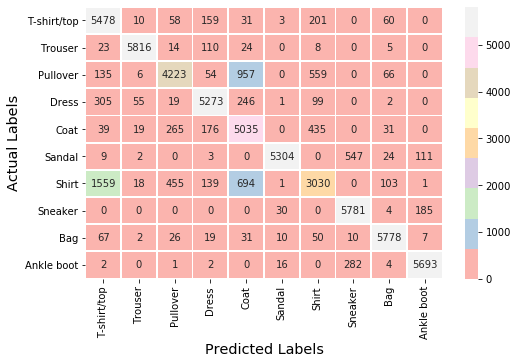

In [59]:
# change conf_mat tensor to numpy or directly pass conf_mat2
conf_df = pd.DataFrame(conf_mat.numpy(),columns=train_set.classes,index=train_set.classes)

f,ax = plt.subplots(1,1,figsize=(8,5))
sns.heatmap(conf_df,annot=True,lw=0.8,cmap='Pastel1',ax=ax,
            fmt='d', # fmt='d'/ fmt='g' for suppressing scientific notation
            annot_kws={"size": 10})

ax.set_xlabel('Predicted Labels',size='x-large')
ax.set_ylabel('Actual Labels',size='x-large')

This Confusion Matrix says that out of all the 6000 images of T-Shirt/Top, 
1. 5273 were correctly predicted
2. 18 were predicted as Trousers, 396 as Shirts and none were predicted as Sneakers or Ankle Boots

# Hyper Parameter tuning with Tensorboard and loops
Works like Grid Search
**Note: You should never use this approach in real life as this is very time consuming. This is for demonstration of usefullness of  `tensorboard` **

In [60]:
torch.set_grad_enabled(True) # this is True by default

batch_size_list = [32,512]
lr_list = [0.01,0.001]


all_list = [batch_size_list,lr_list] 
permutations = list(itertools.product(*all_list))
# here are (2*2) combinations to try for model for 2 epochs each

for BATCH_SIZE,lr in tqdm(permutations):
    
    network = Network()
    optimizer = optim.Adam(network.parameters(),lr=lr)

    comment = f"Hyper Parameters: BATCH={BATCH_SIZE}, lr={lr}"
    tb = SummaryWriter(comment=comment)
    
    for epoch in range(2):

        total_loss = 0
        total_accuracy = 0
        
        train_loader = torch.utils.data.DataLoader(train_set,batch_size=BATCH_SIZE) 

        for batch in train_loader: 
            images,labels = batch

            pred = network(images)
            loss = F.cross_entropy(pred,labels,reduction='sum')

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss+= loss.item()
            total_accuracy+= get_correct_pred(pred,labels)

        acc = (total_accuracy/len(train_set))
        avg_loss = (total_loss/len(train_set))

        tb.add_scalar('AVG Loss',avg_loss,epoch)
        tb.add_scalar('Accuracy',acc,epoch)
        tb.add_scalar('Total Correct',total_accuracy,epoch)

        for layer_name,weight in network.named_parameters():
            tb.add_histogram(layer_name,weight,epoch)
            tb.add_histogram(f'{layer_name}.grad',weight.grad,epoch)

tb.close()

100%|██████████| 4/4 [02:48<00:00, 42.10s/it]


# Data Loading Techniques
There are different scenarios when you have to load your images. Your images can be stored within an array in forms of pizel matrices, there can be a `DataFrame` which contains the image name and label column, there can be images inside a nested directory where each type of images are in a seperate directory and so on. I'll try to shed light on some.

## 1. Load data from Numpy Array or Pandas DataFrame

In [61]:
my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
print(my_x,'\n')
my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets or labels for corresponding X)
print(my_y,'\n')

tensor_x = torch.Tensor(my_x) # transform to torch tensor
print(tensor_x)
tensor_y = torch.Tensor(my_y)

my_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = torch.utils.data.DataLoader(my_dataset) # create your dataloader

[array([[1., 2.],
       [3., 4.]]), array([[5., 6.],
       [7., 8.]])] 

[array([4.]), array([2.])] 

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


## 2. Loading images from Directory

In [62]:
def load_dataset(data_path):
    # data_path = 'data/train/' # our your own directory
    train_dataset = torchvision.datasets.ImageFolder(root=data_path,transform=torchvision.transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64,num_workers=0,shuffle=True)
    return train_loader

# use the above method like

# for batch_idx, (data, target) in enumerate(load_dataset()):
    #train network

## 3. Keras type - Different classes in different folders
[Link to demo and documentation](https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)

In [63]:
# train_dataset=datasets.ImageFolder(root="./root/",transform=train_transforms)

# Channel First Channel Last Problem Solution.
Sometimes when we have our data in the form of `(B,C,W,H)`and we have to feed the model with `(B,W,H,C)` or vice versa, then we'll have to change the axis. Numpy has a functionality for it and we can do it by using more than one method. 

`%timeit` is a magic function which will run the code for thousands of iterations. Not making it up, % functions are called magic functions. You can see the time taken by each code for execution and select the fastest according to your needs.

In [64]:
x = np.zeros((3,10,20))
print('Before: ',x.shape)

# %timeit np.moveaxis(x,[0,1,2],[2,0,1]) 
x1 = np.moveaxis(x,[0,1,2],[2,0,1]) # use single digit for a single axis rotation
print('Method 1:', x1.shape)

# %timeit np.einsum('ijk->kij',x)
x2 = np.einsum('ijk->jki',x)
print('Method 2: ',x2.shape)

x3 = np.rollaxis(x, 0, 3) # roll any of the two axis or in simple terms, interchange
print('Method 3: ',x3.shape)

x4 = np.transpose(x,axes=(1,2,0))
print('Method 4: ',x4.shape)

x5 = np.reshape(x,(10,20,3)) # because original shape is 3,10,20
print('Method 5: ',x5.shape)

Before:  (3, 10, 20)
Method 1: (10, 20, 3)
Method 2:  (10, 20, 3)
Method 3:  (10, 20, 3)
Method 4:  (10, 20, 3)
Method 5:  (10, 20, 3)


# END Of PyTorch Tutorial 
but

**"Every Finish Line is the Beginning of a New Race"- Lil Wayne**

Below are some demonstrations of similarities of `numpy` and `PyTorch` workings. You'll be seeing the deep working of `stack`, `concatenate` operations and much more.

# Numpy Extra
Please try all the examples by yourself to get the true deeper understanding of working of methods

## Stack vs Concat

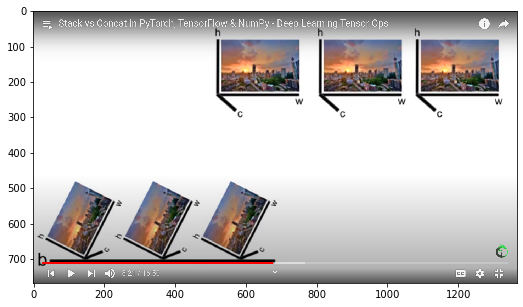

In [66]:
fig=plt.figure(figsize=(15,5))
plt.imshow(plt.imread('/kaggle/input/cnn-images/stack_concat.png'))
# courtesy of Deeplizard

Suppose we have a scenario where we have 3 individual images with `(C,W,H)` and three seperate images as `(B,C,W,H)`. What do we do now? 

Ans: Stack the upper three images and concat those with the below 3 to make a batch of 6 images

## Adding an extra dimension as a batch inside a matrix in numpy
You can use `np.reshape()` and adding extra one dimension anywhere won't effect because number of elements will always be same

In [67]:
x = np.zeros((3,10,20))
print('Original: ',x.shape)
print('Case 1: ',np.reshape(x,(1,3,1,1,10,20,1,1,1)).shape)
print('Case 2: ',np.reshape(x,(1,25,1,12,1,2,1)).shape)

Original:  (3, 10, 20)
Case 1:  (1, 3, 1, 1, 10, 20, 1, 1, 1)
Case 2:  (1, 25, 1, 12, 1, 2, 1)


In [68]:
for i in range(len(x.shape)+1):
    print('Add new axis at:',i)
    print('New Shape is: ',np.expand_dims(x,axis=i).shape,'\n')

Add new axis at: 0
New Shape is:  (1, 3, 10, 20) 

Add new axis at: 1
New Shape is:  (3, 1, 10, 20) 

Add new axis at: 2
New Shape is:  (3, 10, 1, 20) 

Add new axis at: 3
New Shape is:  (3, 10, 20, 1) 



## Stack and Concatenate
Numpy has `np.stack()` and `np.concatenate()` functionality just like PyTorch so we can use these too

In [69]:
t1,t2,t3 = np.array([1,1,1]),np.array([2,2,2]),np.array([3,3,3])

#### Concatenate

In [70]:
x_simple_cat_dim0 = np.concatenate((t1,t2,t3),)
x_simple_cat_dim0


# Below code will produce error as there is no axis=1
# x_simple_cat_dim1 = np.concatenate((t1,t2,t3),axis=1)
# print(x_simple_cat_dim1)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

#### Concatenate + expand_dims
`expand_dims()` adds an extra dimension just like the **opposite** of `squeeze()`

In [71]:
np.concatenate((np.expand_dims(t1,0),
                np.expand_dims(t2,0),
                np.expand_dims(t3,0)),
               axis=0)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [72]:
np.concatenate((np.expand_dims(t1,0),
                np.expand_dims(t2,0),
                np.expand_dims(t3,0)),
               axis=1)

array([[1, 1, 1, 2, 2, 2, 3, 3, 3]])

In [73]:
np.concatenate((np.expand_dims(t1,1),
                np.expand_dims(t2,1),
                np.expand_dims(t3,1)),
               axis=0)

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3]])

In [74]:
np.concatenate((np.expand_dims(t1,1),
                np.expand_dims(t2,1),
                np.expand_dims(t3,1)),
               axis=1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

#### Stack

In [75]:
x_simple_stack_dim0 = np.stack((t1,t2,t3),axis=0)
x_simple_stack_dim0

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [76]:
x_simple_stack_dim1 = np.stack((t1,t2,t3),axis=1)
x_simple_stack_dim1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

### Stack -> {concat(expand_dims),stack}

In [77]:
np.stack((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=0)

array([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]])

This what we usually aim for. This is a batch of 2 made by stacking 2 grayscale images

In [78]:
np.stack((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=1)

array([[[1, 2, 3],
        [1, 1, 1]],

       [[1, 2, 3],
        [2, 2, 2]],

       [[1, 2, 3],
        [3, 3, 3]]])

### Concat -> {concat(expand_dims),stack}

In [79]:
np.concatenate((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=0)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [80]:
np.concatenate((np.concatenate((np.expand_dims(t1,1),np.expand_dims(t2,1),np.expand_dims(t3,1)),axis=1),
                np.stack((t1,t2,t3))),axis=1)

array([[1, 2, 3, 1, 1, 1],
       [1, 2, 3, 2, 2, 2],
       [1, 2, 3, 3, 3, 3]])

# Inserting  and changing values in numpy arrays

In [81]:
x = np.zeros((3,3))
x

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [82]:
x[0] = 3
x

array([[3., 3., 3.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [83]:
x[0,1:] = 1
x

array([[3., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [84]:
x[1:,1:] = [4.4,5.5] 
x

array([[3. , 1. , 1. ],
       [0. , 4.4, 5.5],
       [0. , 4.4, 5.5]])

# Thank you!!
For being there with me till the end (end of Notebook for the least in this case `*_*` ). Please correct any code or mistakes and please give me suggestions for improvements in comments because I too am a learner like every other human being out here.